# PROJETO VIDA

---
https://www.kaggle.com/kumarajarshi/life-expectancy-who<br>
Expectativa de vida global

Lembre-se: foco na técnica e não no dataset em sí, uma vez que não sabemos como os dados foram coletados. Dataset por WHO https://www.who.int/social_determinants/themes/measurementandevidence/en/

# Aquisição dos Dados

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/qodatecnologia/projeto-vida/master/data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.describe(include = ['object'])

,Country,Status
count,2938,2938
unique,193,2
top,Republic of Korea,Developing
freq,16,2426


In [9]:
df.describe(include = ['float'])

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2744.000000,2938.000000,2385.000000,2904.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,4.602861,738.251295,80.940461,38.321247,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,4.052413,1987.914858,25.070016,20.044034,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.010000,0.000000,1.000000,1.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.877500,4.685343,77.000000,19.300000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.755000,64.912906,92.000000,43.500000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,7.702500,441.534144,97.000000,56.200000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,17.870000,19479.911610,99.000000,87.300000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Pré-processamento dos dados(explorar,limpar,preparar)

## Dados duplicados

---



In [10]:
df.duplicated().sum()

0

In [11]:
# Poderiamos removar as duplicatas com drop_duplicates
df.drop_duplicates(inplace=True)

## Dados faltantes e preenchimento dos mesmos com mediana

---



In [12]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [13]:
df.columns=['Country','Year','Status','Life_Expectancy','Adult_Mortality','Infant_death','Alcohol','Percentage_Expenditure','Hepatitis_B','Measles','BMI','Under_Five_Death','Polio','Total_Expenditure','Diphtheria','Hiv_Aids','GDP','Population','Thin_1_19_Years','Thin_5_9_Year','Income_Comp_Resource','Schooling']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Life_Expectancy         2928 non-null   float64
 4   Adult_Mortality         2928 non-null   float64
 5   Infant_death            2938 non-null   int64  
 6   Alcohol                 2744 non-null   float64
 7   Percentage_Expenditure  2938 non-null   float64
 8   Hepatitis_B             2385 non-null   float64
 9   Measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  Under_Five_Death        2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  Total_Expenditure       2712 non-null   float64
 14  Diphtheria              2919 non-null   

In [15]:
df[['Infant_death']].isna().sum()

Infant_death    0
dtype: int64

In [16]:
df.Life_Expectancy=df.Life_Expectancy.fillna(df.Life_Expectancy.median())
df.Life_Expectancy.isna().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Life_Expectancy         2938 non-null   float64
 4   Adult_Mortality         2928 non-null   float64
 5   Infant_death            2938 non-null   int64  
 6   Alcohol                 2744 non-null   float64
 7   Percentage_Expenditure  2938 non-null   float64
 8   Hepatitis_B             2385 non-null   float64
 9   Measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  Under_Five_Death        2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  Total_Expenditure       2712 non-null   float64
 14  Diphtheria              2919 non-null   

In [18]:
df.isna().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality            10
Infant_death                0
Alcohol                   194
Percentage_Expenditure      0
Hepatitis_B               553
Measles                     0
BMI                        34
Under_Five_Death            0
Polio                      19
Total_Expenditure         226
Diphtheria                 19
Hiv_Aids                    0
GDP                       448
Population                652
Thin_1_19_Years            34
Thin_5_9_Year              34
Income_Comp_Resource      167
Schooling                 163
dtype: int64

In [19]:
df.Adult_Mortality=df.Adult_Mortality.fillna(df.Adult_Mortality.median())
df.Adult_Mortality.isna().sum()

0

In [20]:
df.Alcohol=df.Alcohol.fillna(df.Alcohol.median())
df.Alcohol.isna().sum()

0

In [21]:
df.Hepatitis_B=df.Hepatitis_B.fillna(df.Hepatitis_B.median())
df.Hepatitis_B.isna().sum()

0

In [22]:
df.BMI=df.BMI.fillna(df.BMI.median())
df.BMI.isna().sum()

0

In [23]:
df.Polio=df.Polio.fillna(df.Polio.median())
df.Polio.isna().sum()

0

In [24]:
df.Total_Expenditure = df.Total_Expenditure.fillna(df.Total_Expenditure.median())
df.Total_Expenditure.isna().sum()

0

In [25]:
df.isna().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_death                0
Alcohol                     0
Percentage_Expenditure      0
Hepatitis_B                 0
Measles                     0
BMI                         0
Under_Five_Death            0
Polio                       0
Total_Expenditure           0
Diphtheria                 19
Hiv_Aids                    0
GDP                       448
Population                652
Thin_1_19_Years            34
Thin_5_9_Year              34
Income_Comp_Resource      167
Schooling                 163
dtype: int64

In [26]:
df.Diphtheria=df.Diphtheria.fillna(df.Diphtheria.median())
df.Diphtheria.isna().sum()

0

In [27]:
df.GDP=df.GDP.fillna(df.GDP.median())
df.GDP.isna().sum()

0

In [28]:
df.Population=df.Population.fillna(df.Population.median())
df.Population.isna().sum()

0

In [29]:
df.Thin_1_19_Years=df.Thin_1_19_Years.fillna(df.Thin_1_19_Years.median())
df.Thin_1_19_Years.isna().sum()

0

In [30]:
df.Thin_5_9_Year =df.Thin_5_9_Year.fillna(df.Thin_5_9_Year.median())
df.Thin_5_9_Year.isna().sum()

0

In [31]:
df.Income_Comp_Resource=df.Income_Comp_Resource.fillna(df.Income_Comp_Resource.median())
df.Income_Comp_Resource.isna().sum()

0

In [32]:
df.Schooling=df.Schooling.fillna(df.Schooling.median())
df.Schooling.isna().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Life_Expectancy         2938 non-null   float64
 4   Adult_Mortality         2938 non-null   float64
 5   Infant_death            2938 non-null   int64  
 6   Alcohol                 2938 non-null   float64
 7   Percentage_Expenditure  2938 non-null   float64
 8   Hepatitis_B             2938 non-null   float64
 9   Measles                 2938 non-null   int64  
 10  BMI                     2938 non-null   float64
 11  Under_Five_Death        2938 non-null   int64  
 12  Polio                   2938 non-null   float64
 13  Total_Expenditure       2938 non-null   float64
 14  Diphtheria              2938 non-null   

## Outliers

In [34]:
# AMPLITUDE INTERQUARTIL PARA DETECTAR OUTLIERS
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1 #INTER QUARTILE RANGE
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [35]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_death', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Death', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'Hiv_Aids', 'GDP', 'Population', 'Thin_1_19_Years',
       'Thin_5_9_Year', 'Income_Comp_Resource', 'Schooling'],
      dtype='object')

In [36]:
print("Outliers for Year")
Year_indices, Year_values = find_outliers_tukey(df['Year'])
print(np.sort(Year_values))

Outliers for Year
[]


In [37]:
print("Outliers for Life Expectancy")
Life_Expectancy_indices,Life_Expectancy_values = find_outliers_tukey(df['Life_Expectancy'])
print(np.sort(Life_Expectancy_values))

Outliers for Life Expectancy
[36.3 39.  41.  41.5 42.3 43.1 43.3 43.5 43.8 44.  44.3 44.3 44.5 44.5
 44.6 44.6 44.6]


In [38]:
print("Outliers for Infant death")
Infant_death_indices,Infant_death_values = find_outliers_tukey(df['Infant_death'])
print(np.sort(Infant_death_values))

Outliers for Infant death
[  56   56   56   56   56   56   56   57   57   57   57   57   57   57
   57   57   58   58   58   58   58   58   58   58   58   59   59   59
   59   59   59   59   59   59   60   60   60   60   60   60   60   60
   60   60   60   60   60   61   61   61   61   61   61   61   61   61
   62   62   62   62   62   62   62   63   63   63   63   64   64   64
   64   64   64   64   65   65   65   65   65   65   66   66   66   66
   66   66   66   66   66   67   67   67   68   68   68   68   68   69
   69   69   69   69   69   70   70   70   70   71   71   71   71   71
   72   72   72   72   73   73   74   74   74   75   75   76   76   77
   77   77   78   78   79   80   80   81   81   82   82   82   84   84
   84   85   85   85   86   86   87   87   87   87   87   88   88   88
   88   88   88   89   90   90   91   92   92   92   93   93   94   94
   95   95   96   96   97   97   97   98   99  100  103  103  104  104
  106  109  110  111  111  112  114  114  115  116 

In [39]:
# Substituindo outlier por mediana
df["Infant_death"] = np.where(df["Infant_death"] >3, 3,df['Infant_death'])

In [40]:
df.Infant_death.median()

3.0

In [41]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Death,Polio,Total_Expenditure,Diphtheria,Hiv_Aids,GDP,Population,Thin_1_19_Years,Thin_5_9_Year,Income_Comp_Resource,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,1.832199,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,1.330130,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,3.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,3.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [42]:
print("Outliers for Alcohol")
Alcohol_indices, Alcohol_values = find_outliers_tukey(df['Alcohol'])
print(np.sort(Alcohol_values))

Outliers for Alcohol
[16.99 17.31 17.87]


In [43]:
print("Outliers for Percentage Expenditure")
Percentage_Expenditure_indices, Percentage_Expenditure_values = find_outliers_tukey(df['Percentage_Expenditure'])
print(np.sort(Percentage_Expenditure_values))

Outliers for Percentage Expenditure
[ 1099.248837  1105.659031  1109.854619  1109.969508  1111.191325
  1116.396502  1117.048134  1117.196097  1121.475547  1122.972967
  1127.74347   1128.050886  1132.432517  1133.558003  1137.6237
  1140.615754  1142.212403  1147.1114    1150.418063  1154.893473
  1158.065259  1162.656768  1168.324095  1185.412346  1187.949491
  1192.696619  1197.946328  1199.319976  1209.680547  1212.666327
  1214.558167  1230.748231  1259.940376  1275.689625  1275.877569
  1281.155944  1299.159757  1299.459306  1307.89002   1311.440423
  1317.08348   1340.553699  1346.246697  1349.025282  1356.022164
  1380.228095  1389.772683  1395.454965  1398.042623  1403.022211
  1406.51194   1413.73543   1423.802386  1435.487755  1446.529217
  1455.608186  1475.030397  1486.236406  1487.896562  1491.703605
  1493.051277  1500.412635  1504.30004   1504.329462  1521.672751
  1529.497771  1542.635979  1552.740429  1553.468944  1555.651986
  1559.287158  1562.520827  1578.872339  1

In [44]:
##Replacing the outlier with Median for Percentage Expenditure
df["Percentage_Expenditure"] = np.where(df["Percentage_Expenditure"] >100,64.8845366125,df['Percentage_Expenditure'])

In [45]:
df.Percentage_Expenditure.median()

64.87035189625

In [46]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Death,Polio,Total_Expenditure,Diphtheria,Hiv_Aids,GDP,Population,Thin_1_19_Years,Thin_5_9_Year,Income_Comp_Resource,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,1.832199,4.546875,40.888211,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,1.330130,3.921946,29.511961,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.870352,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,3.000000,7.390000,64.884537,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,3.000000,17.870000,99.080954,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [47]:
print("Outliers for Hepatitis B")
Hepatitis_B_indices, Hepatitis_B_values = find_outliers_tukey(df['Hepatitis_B'])
print(np.sort(Hepatitis_B_values))

Outliers for Hepatitis B
[ 1.  2.  2.  2.  2.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9. 11. 12. 14.
 14. 14. 14. 14. 14. 14. 15. 16. 17. 17. 18. 18. 19. 21. 21. 22. 22. 22.
 23. 24. 24. 25. 25. 26. 27. 27. 27. 28. 28. 28. 28. 28. 29. 29. 29. 31.
 31. 31. 32. 33. 33. 35. 35. 35. 36. 36. 36. 37. 37. 38. 38. 39. 39. 39.
 39. 39. 41. 41. 41. 41. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 43.
 43. 43. 43. 43. 44. 44. 4

In [48]:
print("Outliers for Measles")
Measles_indices, Measles_values = find_outliers_tukey(df['Measles'])
print(np.sort(Measles_values))

Outliers for Measles
[   908    912    917    925    926    927    928    931    938    944
    953    956    958    982    992    998    999   1005   1006   1010
   1014   1015   1016   1019   1022   1028   1043   1060   1064   1081
   1088   1089   1112   1116   1123   1129   1141   1142   1147   1149
   1154   1156   1158   1159   1164   1166   1176   1190   1190   1196
   1204   1205   1208   1212   1217   1218   1222   1224   1233   1238
   1250   1256   1272   1275   1278   1279   1282   1292   1296   1313
   1314   1317   1317   1318   1319   1329   1333   1339   1356   1359
   1361   1370   1374   1379   1385   1395   1398   1407   1415   1419
   1433   1445   1446   1448   1449   1451   1455   1457   1459   1461
   1469   1483   1491   1516   1519   1536   1541   1568   1569   1574
   1578   1588   1594   1599   1599   1601   1607   1613   1617   1622
   1660   1668   1673   1677   1678   1678   1684   1686   1719   1744
   1761   1771   1783   1809   1810   1833   1847   1861

In [49]:
##Replacing the outlier with Median for Percentage Expenditure
df["Measles"] = np.where(df["Measles"] >50,17,df['Measles'])

In [50]:
df.Measles.median()

17.0

In [51]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Death,Polio,Total_Expenditure,Diphtheria,Hiv_Aids,GDP,Population,Thin_1_19_Years,Thin_5_9_Year,Income_Comp_Resource,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,1.832199,4.546875,40.888211,83.022124,10.754595,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,1.330130,3.921946,29.511961,22.996984,10.477241,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.870352,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,3.000000,7.390000,64.884537,96.000000,17.000000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,3.000000,17.870000,99.080954,99.000000,50.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [52]:
print("Outliers for BMI")
BMI_indices, BMI_values = find_outliers_tukey(df['BMI'])
print(np.sort(BMI_values))

Outliers for BMI
[]


In [53]:
print("Outliers for Under Five Death")
Under_Five_Death_indices, Under_Five_Death_values = find_outliers_tukey(df['Under_Five_Death'])
print(np.sort(Under_Five_Death_values))

Outliers for Under Five Death
[  71   71   71   72   72   72   73   73   73   74   74   74   74   75
   75   75   75   75   75   76   76   76   76   77   77   77   77   78
   78   78   78   78   78   78   79   79   79   79   79   79   79   79
   79   80   80   80   80   80   80   80   80   80   80   80   80   81
   81   81   81   82   82   82   82   82   82   82   82   82   83   83
   83   83   83   83   83   84   84   84   84   84   84   84   84   84
   84   84   85   85   85   85   85   86   86   86   86   86   86   87
   87   87   87   87   87   88   88   88   89   89   89   89   89   89
   89   89   89   90   90   90   90   90   90   91   91   91   91   91
   91   92   92   92   92   93   93   93   93   93   93   93   93   93
   93   94   94   94   94   94   95   95   95   95   95   96   96   96
   97   97   97   97   98   98   98   98   99   99   99  100  100  100
  100  101  101  101  101  102  102  102  103  103  104  104  104  105
  106  106  106  106  108  108  108  108  109  

## Substituindo outlier com a mediana de "Under_Five_Death"

In [54]:
df.Under_Five_Death.median()

4.0

In [55]:
df["Under_Five_Death"] = np.where(df["Measles"] >4,4,df['Under_Five_Death'])

In [56]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Death,Polio,Total_Expenditure,Diphtheria,Hiv_Aids,GDP,Population,Thin_1_19_Years,Thin_5_9_Year,Income_Comp_Resource,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,1.832199,4.546875,40.888211,83.022124,10.754595,38.381178,4.840027,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,1.330130,3.921946,29.511961,22.996984,10.477241,19.935375,8.611519,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,2.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.870352,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,3.000000,7.390000,64.884537,96.000000,17.000000,56.100000,4.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,3.000000,17.870000,99.080954,99.000000,50.000000,87.300000,118.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [57]:
print("Outliers Polio")
Polio_indices, Polio_values = find_outliers_tukey(df['Polio'])
print(np.sort(Polio_values))

Outliers Polio
[ 3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9. 17. 23. 24. 24. 26. 26. 26. 31.
 31. 31. 31. 32. 32. 33. 35. 35. 36. 36. 36. 36. 37. 37. 37. 37. 38. 38.
 38. 38. 39. 39. 41. 41. 41. 41. 41. 41. 41. 42. 42. 42. 42. 42. 42. 42.
 43. 43. 43. 43. 44. 44. 44. 44. 44. 44. 44. 44. 44. 44. 44. 44. 45. 45.
 45. 45. 45. 45. 45. 46. 46. 46. 46.

In [58]:
print("Outliers Total Expenditure")
Total_Expenditure_indices, Total_Expenditure_values = find_outliers_tukey(df['Total_Expenditure'])
print(np.sort(Total_Expenditure_values))

Outliers Total Expenditure
[11.78 11.79 11.8  11.8  11.83 11.83 11.87 11.87 11.9  11.92 11.93 11.96
 11.97 11.98 11.99 12.11 12.23 12.24 12.25 12.49 12.6  12.77 12.8  12.94
 13.13 13.38 13.44 13.63 13.66 13.7  13.71 13.73 13.73 13.76 13.83 14.39
 14.55 15.14 15.15 15.27 15.57 15.6  16.2  16.61 16.9  17.   17.14 17.2
 17.2  17.24 17.6 ]


In [59]:
print("Outliers Diphtheria")
Diphtheria_indices, Diphtheria_values = find_outliers_tukey(df['Diphtheria'])
print(np.sort(Diphtheria_values))

Outliers Diphtheria
[ 2.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9. 16. 19. 21. 23. 23. 23. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 28. 28. 29. 29. 31. 31. 31. 31. 32. 33. 33.
 33. 33. 33. 33. 34. 34. 34. 35. 35. 35. 35. 36. 36. 36. 36. 36. 37. 37.
 37. 37. 38. 38. 38. 38. 38. 39. 39. 39. 39. 39. 39. 39. 41. 41. 41. 41.
 41. 41. 41. 41. 41. 41. 41. 42

In [60]:
print("Outliers Hiv_Aids")
Hiv_Aids_indices, Hiv_Aids_values = find_outliers_tukey(df['Hiv_Aids'])
print(np.sort(Hiv_Aids_values))

Outliers Hiv_Aids
[ 1.9  1.9  1.9  1.9  1.9  1.9  1.9  1.9  1.9  1.9  1.9  1.9  1.9  1.9
  1.9  1.9  1.9  1.9  1.9  2.   2.   2.   2.   2.   2.   2.   2.   2.
  2.   2.   2.   2.   2.   2.   2.   2.   2.1  2.1  2.1  2.1  2.1  2.1
  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1  2.1
  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.3  2.3
  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.3  2.4
  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.4  2.5  2.5  2.5
  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.6  2.6  2.6  2.6  2.6
  2.6  2.6  2.7  2.7  2.7  2.7  2.7  2.7  2.7  2.8  2.8  2.8  2.8  2.8
  2.8  2.8  2.8  2.8  2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9  3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.1  3.1  3.1
  3.1  3.1  3.1  3.1  3.1  3.1  3.1  3.1  3.2  3.2  3.2  3.2  3.2  3.2
  3.2  3.3  3.3  3.3  3.3  3.3  3.3  3.3  3.4  3.4  3.4  3.4  3.4  3.5
  3.5  3.5  3.5  3.5  3.5  3.5  3.6  3.6  3.6  3.6  3.6  3.6 

In [61]:
print("Outliers GDP")
GDP_indices, GDP_values = find_outliers_tukey(df['GDP'])
print(np.sort(GDP_values))

Outliers GDP
[ 11122.8627   11138.8746   11161.72441  11183.96191  11224.1548
  11326.21947  11341.13395  11363.41845  11371.93895  11398.76584
  11513.87189  11527.59323  11563.727    11568.1111   11579.6674
  11634.42422  11635.2637   11675.39395  11685.97983  11729.14616
  11814.9994   11837.3913   11843.9392   11929.34991  11938.212
  11984.86857  12126.87614  12127.22522  12154.82994  12189.9516
  12216.9446   12219.37379  12224.86416  12245.25645  12291.46685
  12297.91535  12323.1275   12365.6263   12376.97936  12387.18982
  12538.17883  12542.93565  12565.44197  12565.9876   12593.7374
  12595.4165   12599.52486  12724.39377  12726.9836   12732.2759
  12834.32349  12845.17363  12868.211    12868.8639   12882.28897
  12888.29667  12967.16543  12969.7712   12976.63642  13134.4367
  13145.1484   13167.47289  13198.6693   13235.97757  13467.1236
  13467.46827  13546.69872  13566.9541   13574.749    13613.6147
  13636.34668  13641.1272   13653.2264   13666.58336  13689.98999
  13739

## Substituindo outlier com mediana de "GDP"

In [62]:
df.GDP.median()
df["GDP"] = np.where(df["GDP"] >2500,1766.947595,df['GDP'])

In [63]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Death,Polio,Total_Expenditure,Diphtheria,Hiv_Aids,GDP,Population,Thin_1_19_Years,Thin_5_9_Year,Income_Comp_Resource,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,1.832199,4.546875,40.888211,83.022124,10.754595,38.381178,4.840027,82.617767,5.924098,82.393125,1.742103,1289.129262,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,1.330130,3.921946,29.511961,22.996984,10.477241,19.935375,8.611519,23.367166,2.400770,23.655562,5.077785,672.709120,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,2.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.870352,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,3.000000,7.390000,64.884537,96.000000,17.000000,56.100000,4.000000,97.000000,7.330000,97.000000,0.800000,1766.947595,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,3.000000,17.870000,99.080954,99.000000,50.000000,87.300000,118.000000,99.000000,17.600000,99.000000,50.600000,2494.353552,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [64]:
print("Outliers Population")
Population_indices, Population_values = find_outliers_tukey(df['Population'])
print(np.sort(Population_values))

Outliers Population
[1.11213410e+07 1.11282460e+07 1.11338610e+07 1.11828170e+07
 1.12512660e+07 1.12736610e+07 1.12741960e+07 1.12814690e+07
 1.12932580e+07 1.13453570e+07 1.13529730e+07 1.13661890e+07
 1.13761720e+07 1.14219840e+07 1.15366150e+07 1.15552280e+07
 1.15567630e+07 1.16295530e+07 1.16389290e+07 1.16958630e+07
 1.17163590e+07 1.17196730e+07 1.17317460e+07 1.17719760e+07
 1.18278480e+07 1.18735570e+07 1.18821360e+07 1.19249460e+07
 1.19445870e+07 1.21523540e+07 1.22222510e+07 1.22886510e+07
 1.23366870e+07 1.23661650e+07 1.23834460e+07 1.23986910e+07
 1.25899490e+07 1.26285960e+07 1.26338970e+07 1.26347290e+07
 1.26546210e+07 1.27259740e+07 1.27775110e+07 1.27969250e+07
 1.27987630e+07 1.28527550e+07 1.28531240e+07 1.28666710e+07
 1.29162290e+07 1.31242670e+07 1.31335890e+07 1.34292620e+07
 1.34564170e+07 1.34744890e+07 1.35584690e+07 1.35694380e+07
 1.36184490e+07 1.36766930e+07 1.37352330e+07 1.38291770e+07
 1.41374890e+07 1.41382160e+07 1.41614370e+07 1.42614940e+07
 1.4

In [65]:
print("Outliers Thin_1_19_Years")
Thin_1_19_Years_indices, Thin_1_19_Years_values = find_outliers_tukey(df['Thin_1_19_Years'])
print(np.sort(Thin_1_19_Years_values))

Outliers Thin_1_19_Years
[15.4 15.4 15.4 15.4 15.4 15.4 15.4 15.4 15.4 15.4 15.4 15.6 15.6 15.7
 15.7 15.7 15.7 15.8 15.9 15.9 16.1 16.1 16.3 16.3 16.3 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.2 17.3 17.4 17.5 17.5 17.6 17.7 17.8 17.8
 17.9 17.9 18.  18.  18.1 18.2 18.2 18.3 18.3 18.3 18.4 18.5 18.5 18.6
 18.6 18.7 18.8 18.9 18.9 19.  19.1 19.2 19.2 19.2 19.3 19.3 19.4 19.5
 19.5 19.6 19.7 19.7 19.8 19.9 19.9 21.  21.2 21.4 21.6 21.8 22.  22.2
 26.7 26.8 26.8 26.9 26.9 27.  27.  27.  27.1 27.1 27.2 27.2 27.3 27.4
 27.5 27.7]


In [66]:
print("Outliers Thin_5_9_Year")
Thin_5_9_Year_indices, Thin_5_9_Year_values = find_outliers_tukey(df['Thin_5_9_Year'])
print(np.sort(Thin_5_9_Year_values))

Outliers Thin_5_9_Year
[15.6 15.6 15.7 15.8 15.9 15.9 16.  16.  16.1 16.1 16.1 16.2 16.2 16.3
 16.3 16.4 16.4 16.5 16.5 16.7 16.7 16.9 17.  17.1 17.2 17.3 17.3 17.4
 17.5 17.5 17.6 17.7 17.8 17.8 18.  18.  18.1 18.1 18.2 18.2 18.3 18.3
 18.4 18.4 18.6 18.6 18.6 18.7 18.8 18.8 18.8 18.9 19.  19.  19.1 19.1
 19.1 19.2 19.2 19.3 19.4 19.4 19.5 19.6 19.6 19.7 19.7 19.8 19.9 19.9
 19.9 21.1 21.1 21.3 21.3 21.5 21.5 21.7 21.8 22.  22.2 22.4 22.6 27.3
 27.4 27.5 27.6 27.7 27.8 27.8 27.9 28.  28.  28.1 28.2 28.3 28.4 28.5
 28.6]


In [67]:
print("Outliers Income Comp Resource")
Income_Comp_Resource_indices, Income_Comp_Resource_values = find_outliers_tukey(df['Income_Comp_Resource'])
print(np.sort(Income_Comp_Resource_values))

Outliers Income Comp Resource
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [68]:
print("Outliers Schooling")
Schooling_indices, Schooling_values = find_outliers_tukey(df['Schooling'])
print(np.sort(Schooling_values))

Outliers Schooling
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  2.8  2.9  2.9  2.9  2.9  3.   3.1  3.3  3.4  3.5  3.5  3.5  3.6  3.7
  3.7  3.8  3.8  3.9  3.9  3.9  4.   4.   4.2  4.3  4.3  4.3  4.3  4.4
  4.4  4.4  4.5  4.5  4.5  4.5  4.6  4.6 19.8 20.1 20.1 20.3 20.3 20.3
 20.3 20.4 20.4 20.4 20.5 20.6 20.7]


In [69]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_death', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Death', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'Hiv_Aids', 'GDP', 'Population', 'Thin_1_19_Years',
       'Thin_5_9_Year', 'Income_Comp_Resource', 'Schooling'],
      dtype='object')

In [70]:
# UTILIZE AMPLITUDE INTERQUARTIL E ACABE COM TODOS OUTLIERS DESTE DATASET
# dica:
#q1 = x.quantile(.25)
#q3 = x.quantile(.75)
#iqr = q3 - q1 #INTER QUARTILE RANGE
#floor = q1 - 1.5*iqr # se menor, OUTLIER
#ceiling = q3 + 1.5*iqr # se maior, OUTLIER

## Dataviz

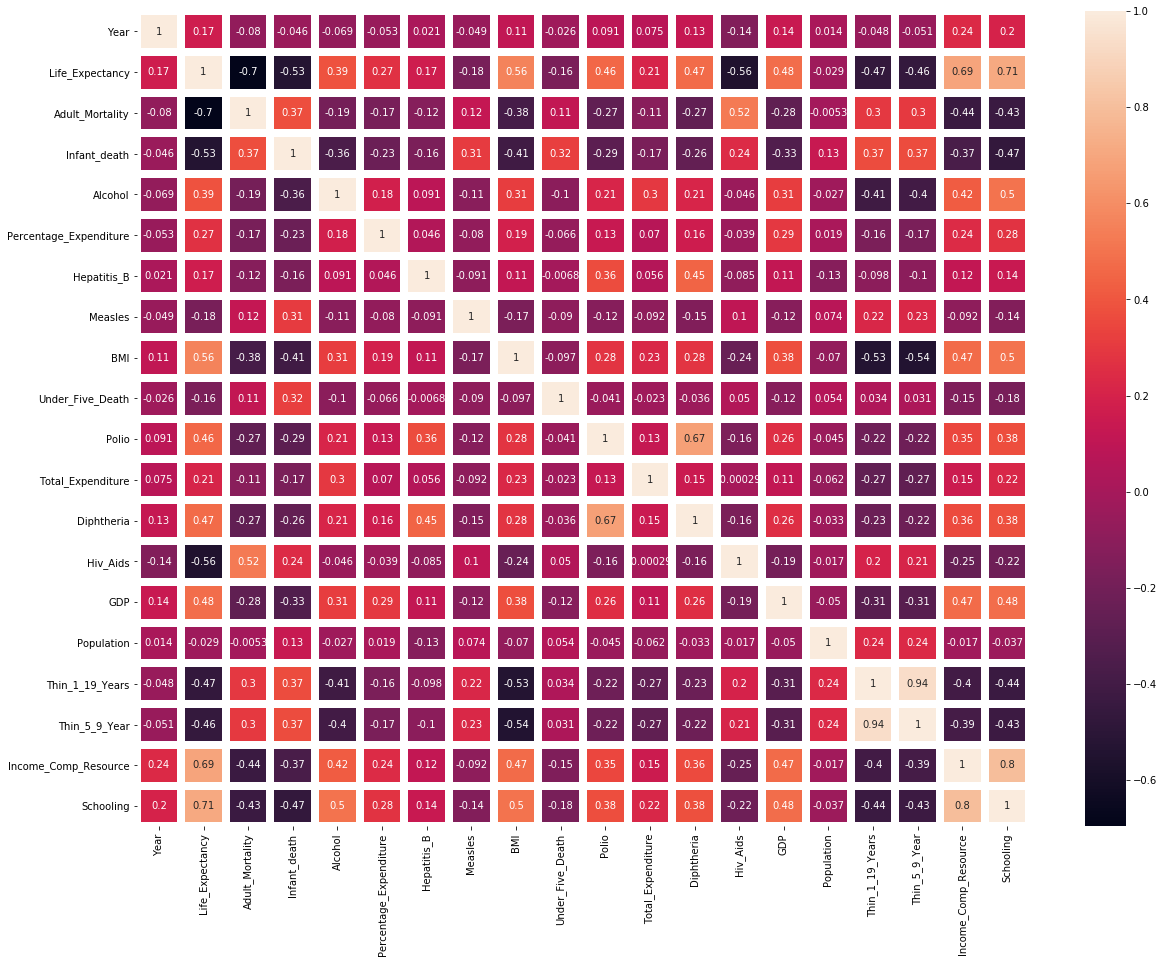

In [71]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidths=7)

## One hot Encoder para "Country"(str) ?!

In [72]:
pd.get_dummies(df.Country,prefix = "Country")

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
Country_dummies = pd.get_dummies(df.Country,prefix = "Country").iloc[:,0:]

In [74]:
df = pd.concat([df,Country_dummies],axis = 1)
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,Afghanistan,2015,Developing,65.0,263.0,3,0.01,71.279624,65.0,17,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,2014,Developing,59.9,271.0,3,0.01,73.523582,62.0,17,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,2013,Developing,59.9,268.0,3,0.01,73.219243,64.0,17,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,2012,Developing,59.5,272.0,3,0.01,78.184215,67.0,17,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,2011,Developing,59.2,275.0,3,0.01,7.097109,68.0,17,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df=df.drop('Country',axis=1)
df.head()

,Year,Status,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,Developing,65.0,263.0,3,0.01,71.279624,65.0,17,19.1,...,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,3,0.01,73.523582,62.0,17,18.6,...,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,3,0.01,73.219243,64.0,17,18.1,...,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,3,0.01,78.184215,67.0,17,17.6,...,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,3,0.01,7.097109,68.0,17,17.2,...,0,0,0,0,0,0,0,0,0,0


## Lidando com a coluna "Status"(String) : One Hot encoder


In [76]:
pd.get_dummies(df.Status,prefix = "Status")

,Status_Developed,Status_Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


In [77]:
Status_dummies = pd.get_dummies(df.Status,prefix = "Status").iloc[:,0:]

In [78]:
df = pd.concat([df,Status_dummies],axis = 1)
df.head()

,Year,Status,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,Developing,65.0,263.0,3,0.01,71.279624,65.0,17,19.1,...,0,0,0,0,0,0,0,0,0,1
1,2014,Developing,59.9,271.0,3,0.01,73.523582,62.0,17,18.6,...,0,0,0,0,0,0,0,0,0,1
2,2013,Developing,59.9,268.0,3,0.01,73.219243,64.0,17,18.1,...,0,0,0,0,0,0,0,0,0,1
3,2012,Developing,59.5,272.0,3,0.01,78.184215,67.0,17,17.6,...,0,0,0,0,0,0,0,0,0,1
4,2011,Developing,59.2,275.0,3,0.01,7.097109,68.0,17,17.2,...,0,0,0,0,0,0,0,0,0,1


In [79]:
df=df.drop('Status',axis=1)
df.head()

,Year,Life_Expectancy,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Death,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,65.0,263.0,3,0.01,71.279624,65.0,17,19.1,4,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,3,0.01,73.523582,62.0,17,18.6,4,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,3,0.01,73.219243,64.0,17,18.1,4,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,3,0.01,78.184215,67.0,17,17.6,4,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,3,0.01,7.097109,68.0,17,17.2,4,...,0,0,0,0,0,0,0,0,0,1


##Feature Selection

---


Make a list of data frame column names

In [80]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
print(l_column)
print(len_feature)

['Year', 'Life_Expectancy', 'Adult_Mortality', 'Infant_death', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Death', 'Polio', 'Total_Expenditure', 'Diphtheria', 'Hiv_Aids', 'GDP', 'Population', 'Thin_1_19_Years', 'Thin_5_9_Year', 'Income_Comp_Resource', 'Schooling', 'Country_Afghanistan', 'Country_Albania', 'Country_Algeria', 'Country_Angola', 'Country_Antigua and Barbuda', 'Country_Argentina', 'Country_Armenia', 'Country_Australia', 'Country_Austria', 'Country_Azerbaijan', 'Country_Bahamas', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Barbados', 'Country_Belarus', 'Country_Belgium', 'Country_Belize', 'Country_Benin', 'Country_Bhutan', 'Country_Bolivia (Plurinational State of)', 'Country_Bosnia and Herzegovina', 'Country_Botswana', 'Country_Brazil', 'Country_Brunei Darussalam', 'Country_Bulgaria', 'Country_Burkina Faso', 'Country_Burundi', 'Country_Cabo Verde', 'Country_Cambodia', 'Country_Cameroon', 'Country_Canada', 'Country_Central African R

## Features numericas em X e "Life Expectancy" em y

In [81]:
"""
colunas do df: 22
colunas removidas(status&Country): 2 
total: 20 colunas
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Columns: 215 entries, Year to Status_Developing
dtypes: float64(16), int64(4), uint8(195)
memory usage: 1.1 MB


In [82]:
X = df[l_column[0:len_feature-195]] 
X.columns

Index(['Year', 'Life_Expectancy', 'Adult_Mortality', 'Infant_death', 'Alcohol',
       'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under_Five_Death', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'Hiv_Aids', 'GDP', 'Population', 'Thin_1_19_Years', 'Thin_5_9_Year',
       'Income_Comp_Resource', 'Schooling'],
      dtype='object')

## Dropar a coluna target


In [83]:
X=X.drop('Life_Expectancy',axis=1)
X.columns

Index(['Year', 'Adult_Mortality', 'Infant_death', 'Alcohol',
       'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under_Five_Death', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'Hiv_Aids', 'GDP', 'Population', 'Thin_1_19_Years', 'Thin_5_9_Year',
       'Income_Comp_Resource', 'Schooling'],
      dtype='object')

In [84]:
X=X.drop('Year',axis=1)
X.columns

Index(['Adult_Mortality', 'Infant_death', 'Alcohol', 'Percentage_Expenditure',
       'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Death', 'Polio',
       'Total_Expenditure', 'Diphtheria', 'Hiv_Aids', 'GDP', 'Population',
       'Thin_1_19_Years', 'Thin_5_9_Year', 'Income_Comp_Resource',
       'Schooling'],
      dtype='object')

In [85]:
y = df[l_column[len_feature-214]]

In [86]:
X.shape

(2938, 18)

In [87]:
X.head()

,Adult_Mortality,Infant_death,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Death,Polio,Total_Expenditure,Diphtheria,Hiv_Aids,GDP,Population,Thin_1_19_Years,Thin_5_9_Year,Income_Comp_Resource,Schooling
0,263.0,3,0.01,71.279624,65.0,17,19.1,4,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,3,0.01,73.523582,62.0,17,18.6,4,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,3,0.01,73.219243,64.0,17,18.1,4,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,3,0.01,78.184215,67.0,17,17.6,4,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,3,0.01,7.097109,68.0,17,17.2,4,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Remover features que não geram valor


In [88]:
X=X.drop('Hepatitis_B',axis=1)
X=X.drop('Percentage_Expenditure',axis=1)
X=X.drop('Measles',axis=1)
X=X.drop('Under_Five_Death',axis=1)
X=X.drop('Total_Expenditure',axis=1)
X=X.drop('Population',axis=1)

In [89]:
X.columns

Index(['Adult_Mortality', 'Infant_death', 'Alcohol', 'BMI', 'Polio',
       'Diphtheria', 'Hiv_Aids', 'GDP', 'Thin_1_19_Years', 'Thin_5_9_Year',
       'Income_Comp_Resource', 'Schooling'],
      dtype='object')

In [90]:
X.shape

(2938, 12)

In [91]:
y.shape

(2938,)

In [92]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_Expectancy, dtype: float64

# Modelo Preditivo

## Criação de X e y, treino/teste


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [94]:
print("Features Treino:",X_train.shape)
print("Features Teste:",X_test.shape)
print()
print("Target Treino:",y_train.shape)
print("Target Teste:",y_test.shape)

Features Treino: (2056, 12)
Features Teste: (882, 12)

Target Treino: (2056,)
Target Teste: (882,)


### Treinar modelo preditivo


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [96]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [97]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Avaliação do modelo e métricas
https://scikit-learn.org/stable/modules/model_evaluation.html

## Intercepto/coeficiente linear em um DataFrame


In [98]:
print("Intercepto:", lm.intercept_)

Intercepto: 54.73043858580871


In [99]:
print("Coeficiente Linear:", lm.coef_)

Coeficiente Linear: [-2.03134551e-02 -6.94537483e-01  3.20313515e-02  4.14271259e-02
  2.58021943e-02  4.18238745e-02 -4.57852306e-01  8.16785701e-04
 -9.26454249e-02  2.31211673e-02  6.37900144e+00  6.60094223e-01]


In [100]:
train_pred = lm.predict(X_train)

* MAE: Média da diferença absoluta entre previsto/realizado
* MSE: Média dos quadrados dos erros
* RMSE: Desvio padrão da diferença entre previsto/realizado

In [101]:
# MSE
metrics.mean_squared_error(y_train,train_pred)

16.859583012030342

In [102]:
# MAE
metrics.mean_absolute_error(y_train,train_pred)

3.0803824228831145

## R² do modelo
O R-quadrado é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. O R-quadrado está sempre entre 0 e 100%:

* 0% indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.
* 100% indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

Em geral, quanto maior o R-quadrado, melhor o modelo se ajusta aos seus dados.

In [103]:
print(f"R-quadrado: {round(metrics.r2_score(y_train,train_pred),2)}")

R-quadrado: 0.81


In [108]:
predictions = lm.predict(X_test)

## Scatter plot das predições/valores reais: devemos encontrar uma linha reta


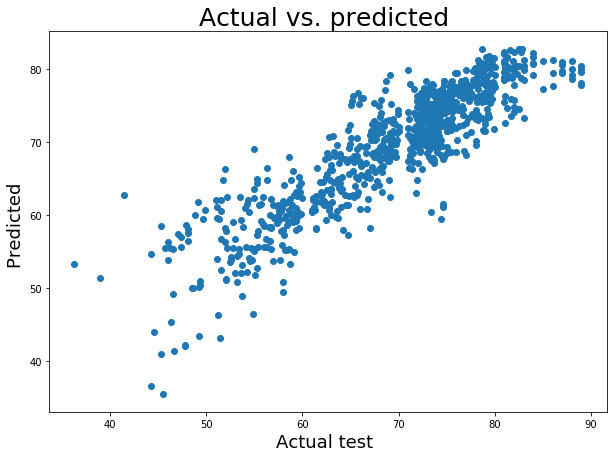

In [132]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted ",fontsize=25)
plt.xlabel("Actual test ",fontsize=18)
plt.ylabel("Predicted ", fontsize=18)
plt.scatter(x=y_test,y=predictions)


## Métricas de avaliação para regressão(treino)
* MAE: Média da diferença absoluta entre previsto/realizado
* MSE: Média dos quadrados dos erros
* RMSE: Desvio padrão da diferença entre previsto/realizado


In [133]:
print(f"Mean absolute error (MAE): {metrics.mean_absolute_error(y_train,train_pred)}")
print(f"Mean square error (MSE): {metrics.mean_squared_error(y_train,train_pred)}")
print(f"Root mean square error (RMSE): {np.sqrt(metrics.mean_squared_error(y_train,train_pred))}")

Mean absolute error (MAE): 3.0803824228831145
Mean square error (MSE): 16.859583012030342
Root mean square error (RMSE): 4.1060422564837715


## Métricas de avaliação para regressão(teste)
* MAE: Média da diferença absoluta entre previsto/realizado
* MSE: Média dos quadrados dos erros
* RMSE: Desvio padrão da diferença entre previsto/realizado

In [134]:
print(f"Mean absolute error (MAE): {metrics.mean_absolute_error(y_test,predictions)}")
print(f"Mean square error (MSE): {metrics.mean_squared_error(y_test,predictions)}")
print(f"Root mean square error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test,predictions))}")

Mean absolute error (MAE): 3.12941549680718
Mean square error (MSE): 18.159377485035392
Root mean square error (RMSE): 4.261382109719262


## Mean Absolute Percentage error(y_train)
O MAPE (Erro Absoluto Médio Percentual) mede o erro em porcentagem. Este é calculado como a média do erro percentual


In [135]:
def mean_absolute_percentage_error(y_train, train_pred):
    y_train,train_pred=np.array(y_train),np.array(train_pred)
    return np.mean(np.abs((y_train - train_pred)/y_train))*100

print(f"Mean absolute percentage error (MAPE): {mean_absolute_percentage_error(y_train,train_pred)}")

Mean absolute percentage error (MAPE): 4.697098273852131


## Mean Absolute Percentage error(y_test)
O MAPE (Erro Absoluto Médio Percentual) mede o erro em porcentagem. Este é calculado como a média do erro percentual


In [ ]:
def mean_absolute_percentage_error(y_test, predictions):
    y_test,predictions=np.array(y_test),np.array(predictions)
    return np.mean(np.abs((y_test - predictions)/y_test))*100

print(f"Mean absolute percentage error (MAPE): {mean_absolute_percentage_error(y_test,predictions)}")